In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = "https://storage.googleapis.com/mledu-dataset/cats_and_dogs_filtered.zip"

In [3]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

In [4]:
zip_dir_base = os.path.dirname(zip_dir)

In [6]:
zip_dir_base
!find $zip_dir_base -type d -print

FIND: Parameter format not correct


In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')

In [8]:
base_dir

'C:\\Users\\Maithili Bode\\.keras\\datasets\\cats_and_dogs_filtered'

In [9]:
train_dir  = os.path.join(base_dir,'train')

In [10]:
train_dir

'C:\\Users\\Maithili Bode\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [11]:
validation_dir = os.path.join(base_dir,'validation')

In [12]:
validation_dir

'C:\\Users\\Maithili Bode\\.keras\\datasets\\cats_and_dogs_filtered\\validation'

In [13]:
train_cats_dir = os.path.join(train_dir,'cats')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [14]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr+num_dogs_tr
total_val = num_cats_val+num_dogs_val
print('total training cats images: ',num_cats_tr)
print('total training dogs images: ',num_dogs_tr)
print('total validation cats images: ',num_cats_val)
print('total validation dogs images:  ',num_dogs_val)
print('Total training Images: ',total_train)
print('Total Validation Images: ',total_val)

total training cats images:  1000
total training dogs images:  1000
total validation cats images:  500
total validation dogs images:   500
Total training Images:  2000
Total Validation Images:  1000


In [15]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [16]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_gen = train_image_generator.flow_from_directory(
batch_size=BATCH_SIZE,
directory=train_dir,
shuffle=True,
target_size=(IMG_SHAPE,IMG_SHAPE),
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                shuffle=False,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
sample_training_images,_ = next(train_data_gen)

In [28]:
sample_training_images.shape

(100, 150, 150, 3)

In [29]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

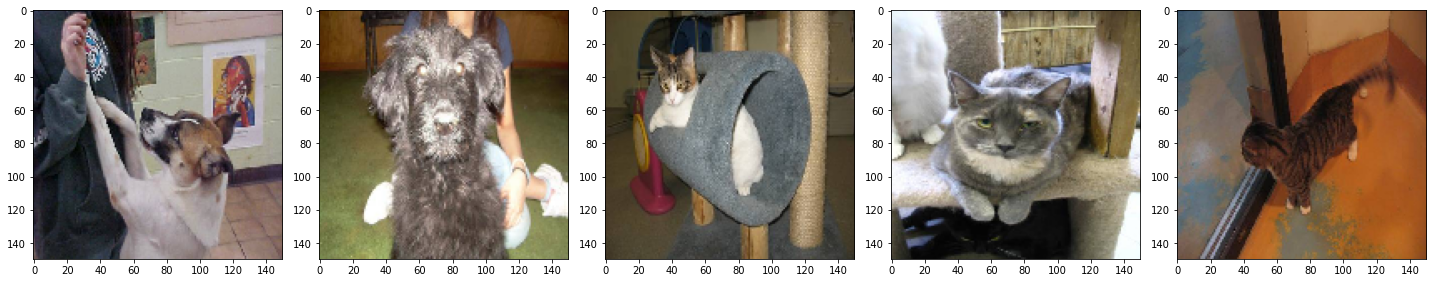

In [30]:
plotImages(sample_training_images[0:5])

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [33]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 29s 1s/step - loss: 0.7153 - accuracy: 0.5140 - val_loss: 0.6696 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 33s 2s/step - loss: 0.6889 - accuracy: 0.5435 - val_loss: 0.7367 - val_accuracy: 0.2656
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 0.6622 - accuracy: 0.6000 - val_loss: 0.6116 - val_accuracy: 0.7063
Epoch 4/10
20/20 [==============================] - 33s 2s/step - loss: 0.6022 - accuracy: 0.6820 - val_loss: 0.5610 - val_accuracy: 0.7375
Epoch 5/10
20/20 [==============================] - 35s 2s/step - loss: 0.5840 - accuracy: 0.6940 - val_loss: 0.4907 - val_accuracy: 0.8250
Epoch 6/10
20/20 [==============================] - 36s 2s/step - loss: 0.5684 - accuracy: 0.6965 - val_loss: 0.6211 - val_accuracy: 0.7094
Epoch 7/10
20/20 [==============================] - 35s 2s/step - loss: 0.5236 - accuracy: 0.7375 - val_loss: 0.7209 - val_accuracy: 0.6031
Epoch 8/10
20/20 [==

In [35]:
sample_training_images,_ = next(train_data_gen)

In [36]:
sample_training_images.shape

(100, 150, 150, 3)

In [37]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

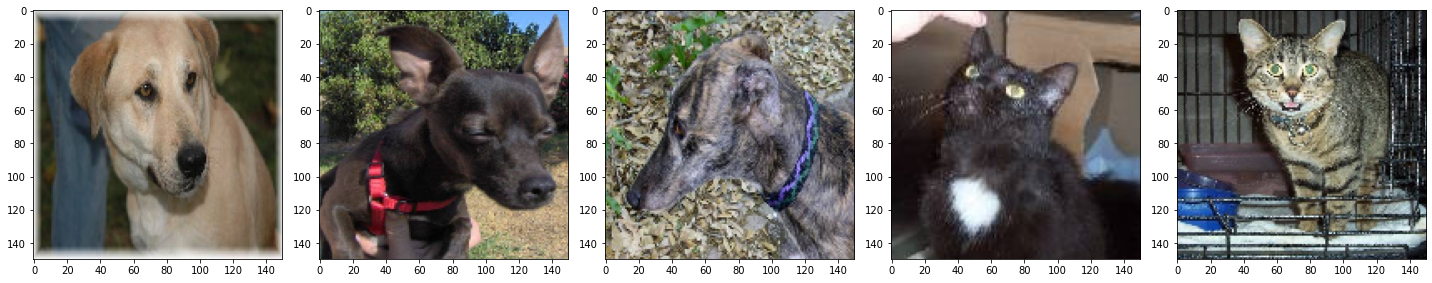

In [38]:
plotImages(sample_training_images[0:5])


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 36s 2s/step - loss: 0.7333 - accuracy: 0.4940 - val_loss: 0.6983 - val_accuracy: 0.3562
Epoch 2/10
20/20 [==============================] - 38s 2s/step - loss: 0.6815 - accuracy: 0.5535 - val_loss: 0.7061 - val_accuracy: 0.5219
Epoch 3/10
20/20 [==============================] - 38s 2s/step - loss: 0.6658 - accuracy: 0.6045 - val_loss: 0.5726 - val_accuracy: 0.8750
Epoch 4/10
20/20 [==============================] - 38s 2s/step - loss: 0.6336 - accuracy: 0.6440 - val_loss: 0.6235 - val_accuracy: 0.7375
Epoch 5/10
20/20 [==============================] - 38s 2s/step - loss: 0.5884 - accuracy: 0.6920 - val_loss: 0.6739 - val_accuracy: 0.6438
Epoch 6/10
20/20 [==============================] - 38s 2s/step - loss: 0.5487 - accuracy: 0.7365 - val_loss: 0.6399 - val_accuracy: 0.6719
Epoch 7/10
20/20 [==============================] - 37s 2s/step - loss: 0.5167 - accuracy: 0.7515 - val_loss: 0.8912 - val_accuracy: 0.5125
Epoch 8/10
20/20 [==

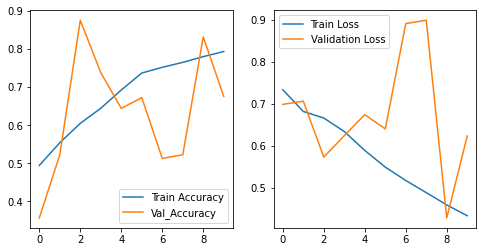

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()

In [44]:
#Augmentation

In [45]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [46]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [47]:
augmented_image = [train_data_gen[0][0][0] for i in range(5)]

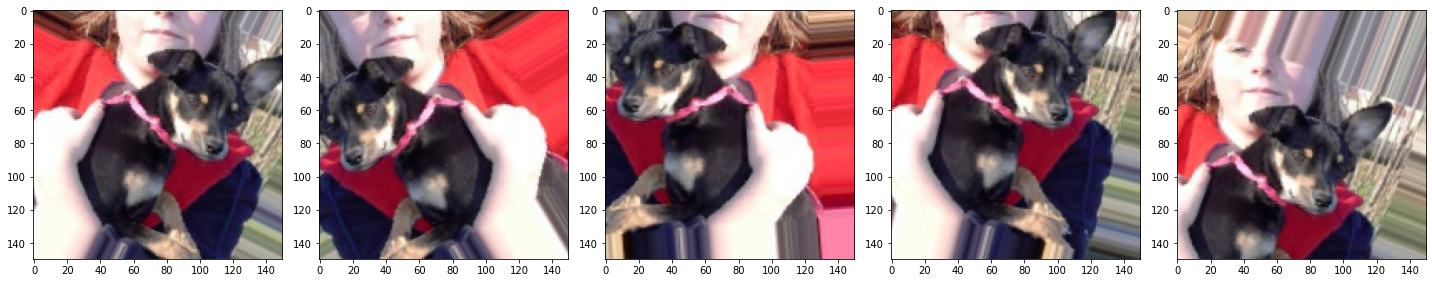

In [48]:
plotImages(augmented_image)


In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])


In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [51]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 37s 2s/step - loss: 0.7295 - accuracy: 0.4995 - val_loss: 0.6741 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 37s 2s/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6575 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 37s 2s/step - loss: 0.6924 - accuracy: 0.5010 - val_loss: 0.7247 - val_accuracy: 0.0094
Epoch 4/10
20/20 [==============================] - 39s 2s/step - loss: 0.6921 - accuracy: 0.5025 - val_loss: 0.6850 - val_accuracy: 0.2656
Epoch 5/10
20/20 [==============================] - 37s 2s/step - loss: 0.6855 - accuracy: 0.5665 - val_loss: 0.6711 - val_accuracy: 0.7406
Epoch 6/10
20/20 [==============================] - 38s 2s/step - loss: 0.6783 - accuracy: 0.5865 - val_loss: 0.9141 - val_accuracy: 0.0500
Epoch 7/10
20/20 [==============================] - 37s 2s/step - loss: 0.6755 - accuracy: 0.5790 - val_loss: 0.8055 - val_accuracy: 0.3875
Epoch 8/10
20/20 [==

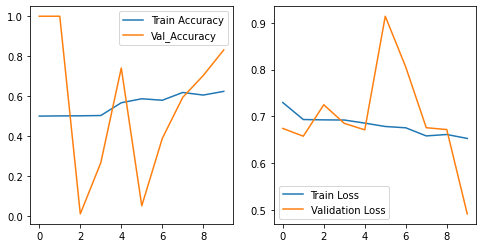

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()